## Stock Market Analysis

### Importing necessary librairies

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Reading the dataset

In [75]:
Reliance = pd.read_csv(r'C:\Users\vaibh\Downloads\stock_data.csv', index_col='Date', parse_dates=['Date'])
Reliance.head()

,OPEN,HIGH,LOW,PREV_CLOSE,VOLUME,symbol_name
Date,,,,,,
2024-04-15,2922.00,2964.25,2892.65,2934.30,6451031.00,RELIANCE
2024-04-12,2951.75,2972.95,2926.15,2959.15,7775506.00,RELIANCE
2024-04-10,2932.70,2974.00,2932.70,2927.30,4569165.00,RELIANCE
2024-04-09,2978.00,2979.60,2925.00,2971.95,3535707.00,RELIANCE
2024-04-08,2925.95,2981.95,2922.00,2920.20,4178559.00,RELIANCE


In [76]:
Reliance.describe()

,OPEN,HIGH,LOW,PREV_CLOSE
count,496.000000,496.000000,496.000000,496.000000
mean,2541.545867,2564.102218,2518.354940,2539.672077
std,181.839218,186.007092,179.579453,182.684105
min,2215.000000,2220.000000,2180.000000,2201.250000
25%,2414.912500,2426.750000,2386.762500,2408.737500
50%,2518.025000,2537.700000,2492.325000,2514.400000
75%,2614.250000,2642.600000,2588.500000,2617.700000
max,3011.550000,3024.900000,2976.000000,3014.800000


In [77]:
Reliance.columns

Index(['OPEN', 'HIGH', 'LOW', 'PREV_CLOSE', 'VOLUME', 'symbol_name'], dtype='object')

In [78]:
Reliance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2024-04-15 to 2022-04-18
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OPEN         496 non-null    float64
 1   HIGH         496 non-null    float64
 2   LOW          496 non-null    float64
 3   PREV_CLOSE   496 non-null    float64
 4   VOLUME       496 non-null    object 
 5   symbol_name  496 non-null    object 
dtypes: float64(4), object(2)
memory usage: 27.1+ KB


In [79]:
Reliance.isna().sum()

OPEN           0
HIGH           0
LOW            0
PREV_CLOSE     0
VOLUME         0
symbol_name    0
dtype: int64

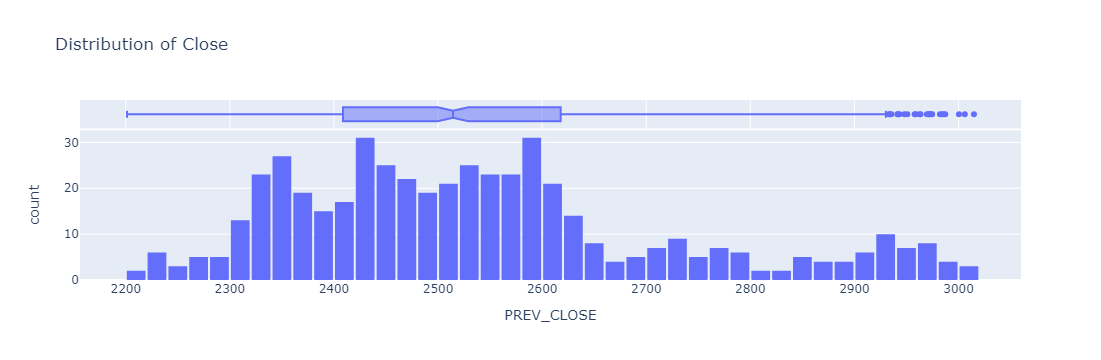

In [80]:
fig = px.histogram(Reliance, 
                   x='PREV_CLOSE', 
                   marginal='box', 
                   nbins=47, 
                   title='Distribution of Close')
fig.update_layout(bargap=0.1)
fig.show()

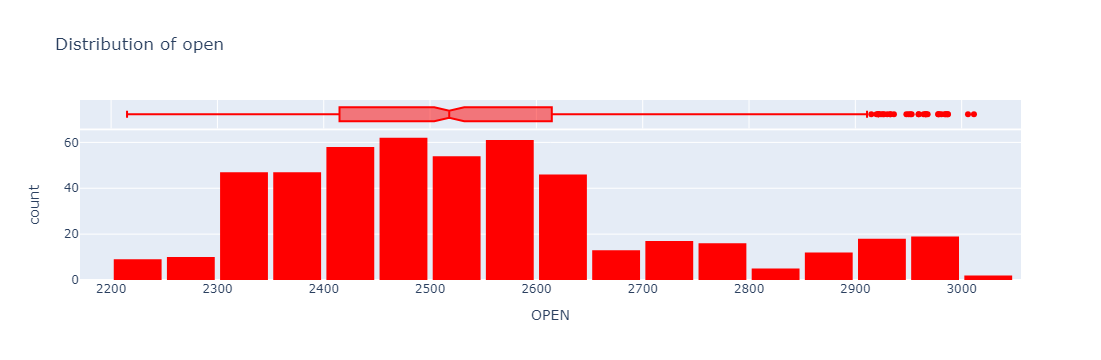

In [81]:
fig = px.histogram(Reliance, 
                   x='OPEN', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of open')
fig.update_layout(bargap=0.1)
fig.show()

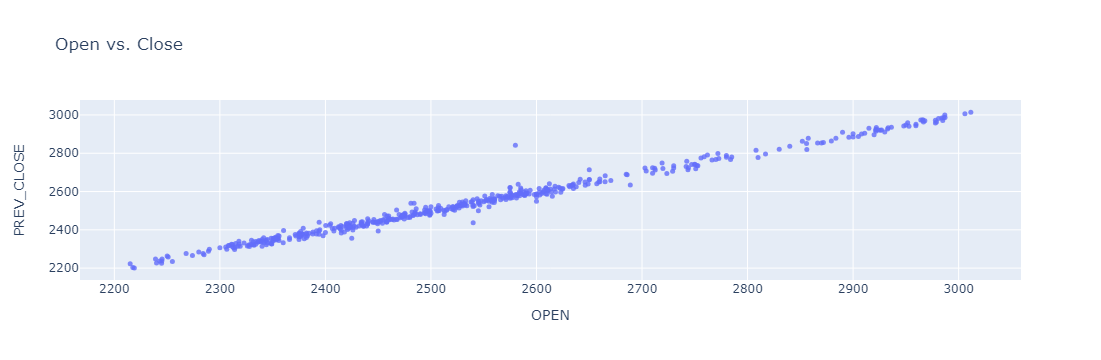

In [82]:
fig = px.scatter(Reliance, 
                 x='OPEN', 
                 y='PREV_CLOSE', 
                 
                 opacity=0.8, 
                  
                 title='Open vs. Close')
fig.update_traces(marker_size=5)
fig.show()

### Plotting normalize graph

In [83]:
numeric_df = Reliance.select_dtypes(include='number')
corr_matrix = numeric_df.corr()


In [84]:
print(Reliance.dtypes)

OPEN           float64
HIGH           float64
LOW            float64
PREV_CLOSE     float64
VOLUME          object
symbol_name     object
dtype: object


In [85]:
numeric_df = Reliance.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
print(corr_matrix)


                OPEN      HIGH       LOW  PREV_CLOSE
OPEN        1.000000  0.993065  0.992571    0.994166
HIGH        0.993065  1.000000  0.991837    0.988617
LOW         0.992571  0.991837  1.000000    0.988599
PREV_CLOSE  0.994166  0.988617  0.988599    1.000000


In [86]:
print(Reliance.index.min())  # Print the minimum date in the data
print(Reliance.index.max())  # Print the maximum date in the data


2022-04-18 00:00:00
2024-04-15 00:00:00


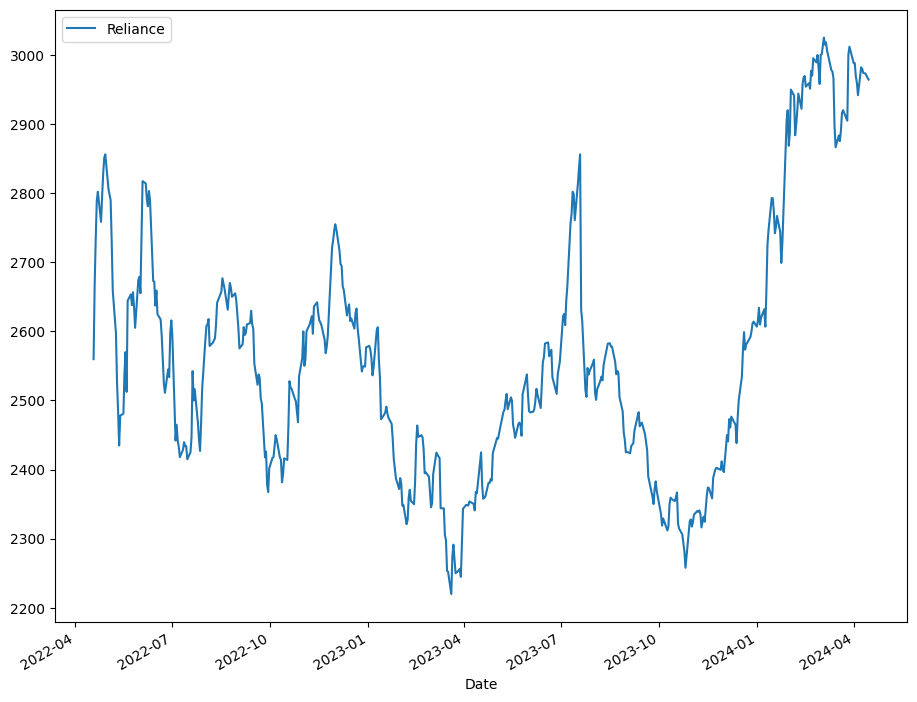

In [87]:
# Plotting before normalization
# Convert 'Reliance.HIGH' column to float data type
Reliance['HIGH'] = Reliance['HIGH'].astype(float)

# Now, plot the 'Reliance.HIGH' column
Reliance.HIGH.plot()
plt.legend(['Reliance'])
plt.show()


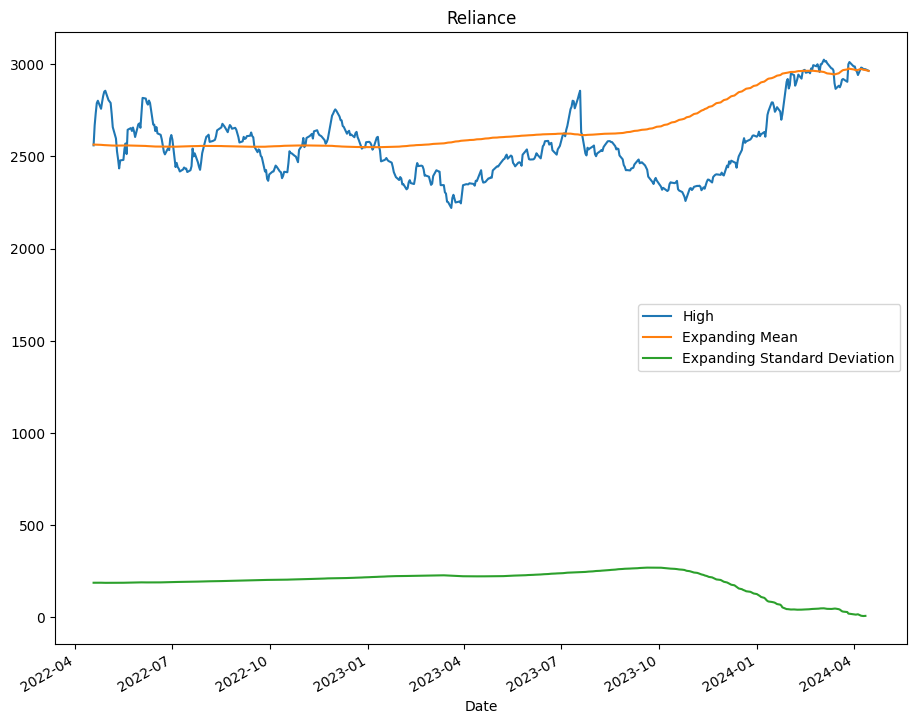

In [88]:
# Expanding window functions
Reliance_mean = Reliance.HIGH.expanding().mean()
Reliance_std = Reliance.HIGH.expanding().std()
Reliance.HIGH.plot()
Reliance_mean.plot()
Reliance_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.title('Reliance')
plt.show()

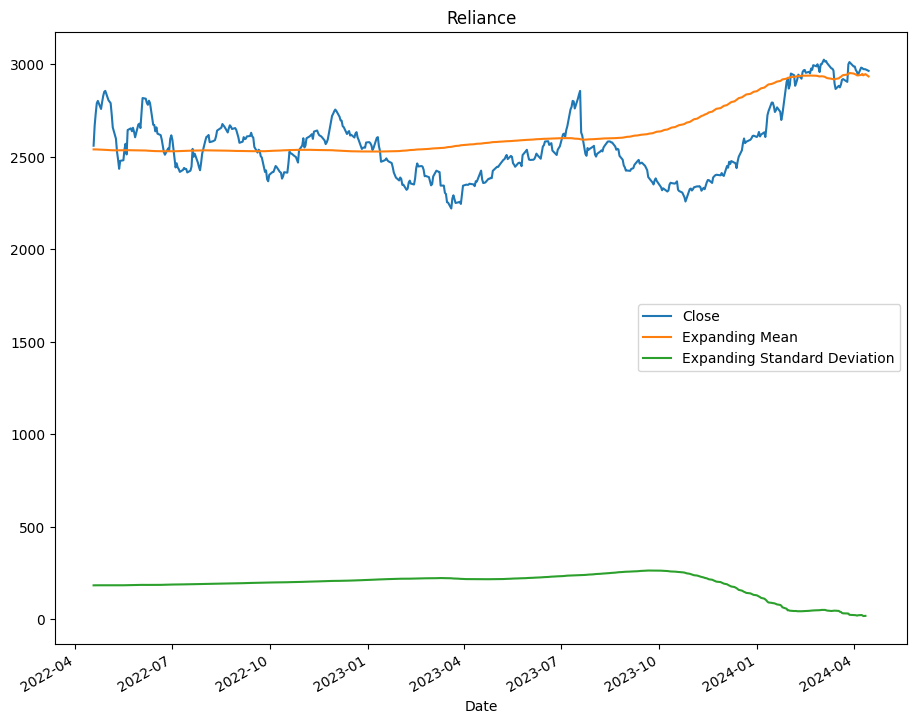

In [89]:
# Expanding window functions
Reliance_mean = Reliance.PREV_CLOSE.expanding().mean()
Reliance_std = Reliance.PREV_CLOSE.expanding().std()
Reliance.HIGH.plot()
Reliance_mean.plot()
Reliance_std.plot()
plt.legend(['Close','Expanding Mean','Expanding Standard Deviation'])
plt.title('Reliance')
plt.show()

In [90]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install statsmodels

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ---------------------------------------- 60.6/60.6 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB 6.9 MB/s eta 0:00:02
   - -------------------------------------- 0.5/9.8 MB 10.0 MB/s eta 0:00:01
   ---- ----------------------------------- 1.0/9.8 MB 7.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.8 MB 9.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.8/9.8 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 12.6 MB/s eta 0:00:01
   ----------------- ---------------------- 4.2/9.8 MB 12.7 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.8 MB 13.9 MB/s eta 0:00:01
   ---------------------- ----------------- 5.5/9.8 MB 13.1 MB/s eta 0:00:01
   -------------

In [91]:
from pylab import rcParams
import statsmodels.api as sm

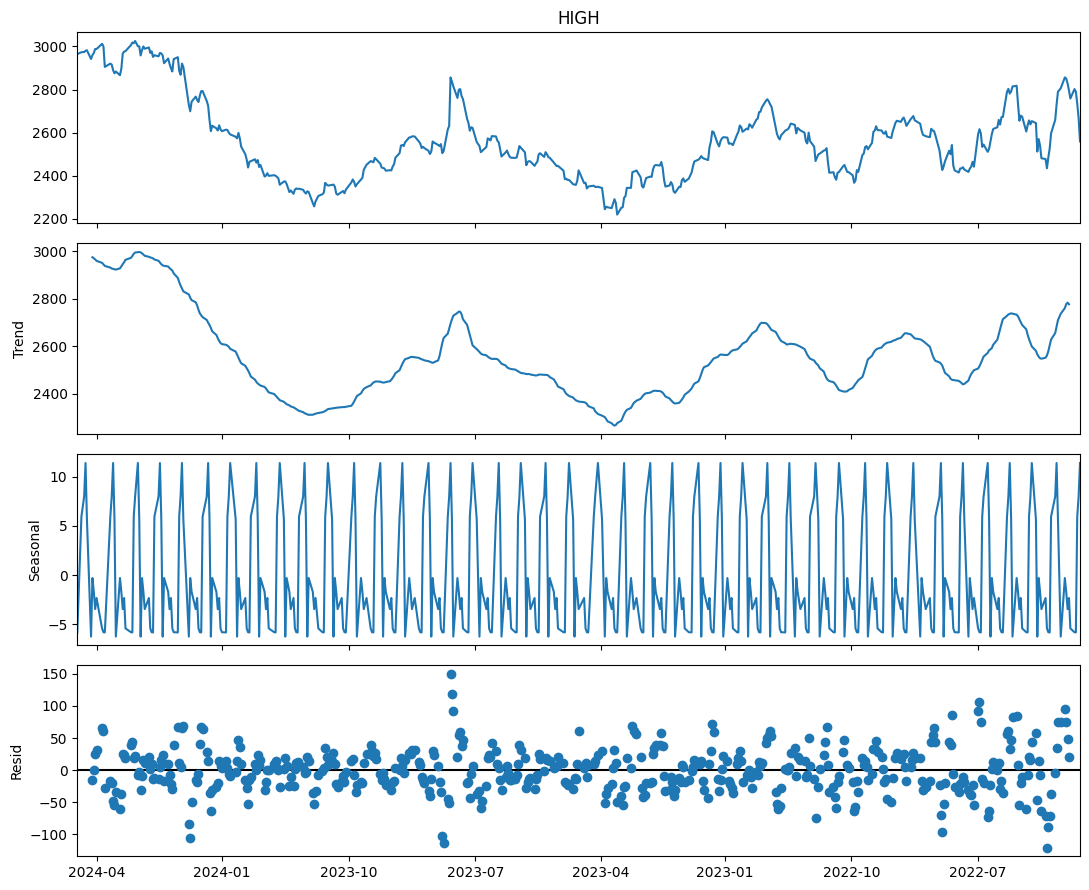

In [92]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_Reliance_volume = sm.tsa.seasonal_decompose(Reliance["HIGH"],period=12) # The frequncy is annual
figure = decomposed_Reliance_volume.plot()
plt.show()

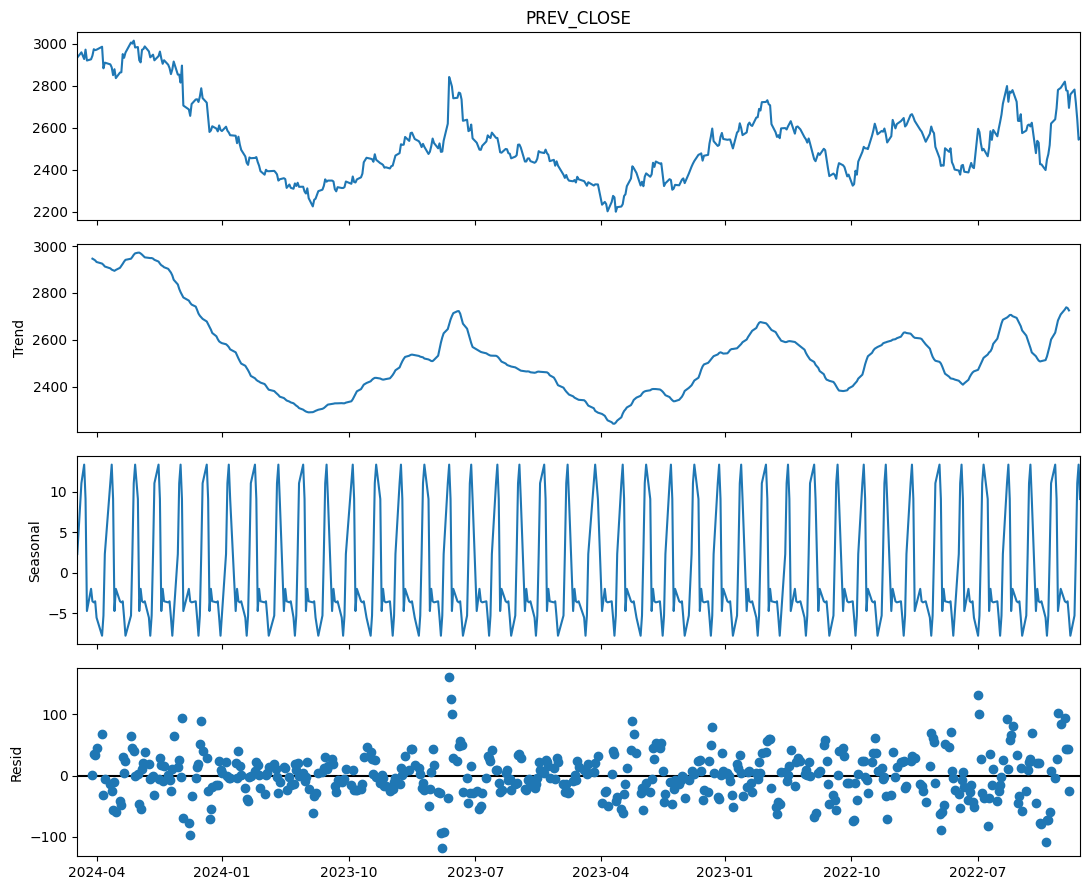

In [93]:
rcParams['figure.figsize'] = 11, 9
decomposed_Reliance_volume = sm.tsa.seasonal_decompose(Reliance["PREV_CLOSE"],period=12) # The frequncy is annual
figure = decomposed_Reliance_volume.plot()
plt.show()